In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import spacy
import re


from sklearn.model_selection import train_test_split 

In [2]:
is_using_gpu = spacy.prefer_gpu()
if is_using_gpu:
    torch.set_default_tensor_type("torch.cuda.FloatTensor")

nlp_roberta = spacy.load('en_pytt_robertabase_lg')
nlp_xlnet = spacy.load('en_pytt_xlnetbasecased_lg')
print(nlp_roberta.pipe_names)
print(nlp_xlnet.pipe_names)

['sentencizer', 'pytt_wordpiecer', 'pytt_tok2vec']
['sentencizer', 'pytt_wordpiecer', 'pytt_tok2vec']


In [3]:
csv_path = 'dadjokes-subreddit-archive/data_dadjokes.csv'
jokes_path = 'dadjokes-subreddit-archive/data_jokes.csv'

jokes = pd.read_csv(jokes_path, na_values=["[deleted]", "",'N/A'], sep='|')
dj = pd.read_csv(csv_path, na_values=["[deleted]", "",'N/A'], sep='|')
dj.head()

,id,createdUTC,parent_createdUTC,author,title,selftext,score,num_comments
0,czh0b5,1567577877,NaN,CMoy1980,Did you know about the Mexican holiday that ce...,It’s called Queso Dia,1,0
1,czgzij,1567577703,NaN,xjohnnyxleex,"No wonder batteries die, it's gotta hurt to ne...",NaN,1,1
2,czgr1x,1567576067,NaN,kwagmyre1907,What does the priest of the Vegetable Church say?,Lettuce pray,1,0
3,czgqyv,1567576046,NaN,wonder-er,Did you hear about the guy who got arrested fo...,He made bale.,1,0
4,czglpu,1567574996,NaN,DesertRebel,Shot my first turkey last year,Scared the shit out of everyone in the frozen ...,1,0


In [4]:
jokes.head()

,id,createdUTC,parent_createdUTC,author,title,selftext,score,num_comments
0,czi77n,1567586974,NaN,brooksy67,Whats the stupidest animal in the jungle?,A polar bear,1,0
1,czi2nb,1567585886,NaN,The_RockObama,I was teaching my 2 year old son how to drink ...,His mom walks in just to hear me say to him: '...,1,1
2,czi1pp,1567585656,NaN,wrongdotcom,Mate 1: I love my brown eyed girlfriend,Mate 2: But she has blue eyes\n\nMate 1: Exactly,1,0
3,czi0t7,1567585443,NaN,redhead_bandit,My mom doesnt want me to play videogames becau...,Well I don't believe her bullshit. I'm light b...,1,0
4,czi00y,1567585255,NaN,AlphaScar,I Went Traveling Recently...,"...and was shocked to discover that in Aruba, ...",1,1


In [5]:
print(dj.isna().sum())
print(jokes.isna().sum())

id                        0
createdUTC                0
parent_createdUTC    159592
author                14417
title                     3
selftext              14285
score                     0
num_comments              0
dtype: int64
id                        0
createdUTC                0
parent_createdUTC    989287
author               168017
title                    25
selftext             112425
score                     0
num_comments              0
dtype: int64


In [6]:
def fill_na(df):
    df.title.fillna('', inplace=True)
    df.selftext.fillna('', inplace=True)
    return df

dj = fill_na(dj)
jokes = fill_na(jokes)
print(dj.isna().sum())
print(jokes.isna().sum())

id                        0
createdUTC                0
parent_createdUTC    159592
author                14417
title                     0
selftext                  0
score                     0
num_comments              0
dtype: int64
id                        0
createdUTC                0
parent_createdUTC    989287
author               168017
title                     0
selftext                  0
score                     0
num_comments              0
dtype: int64


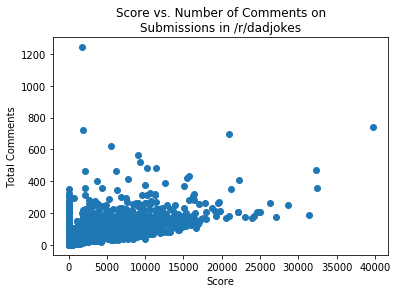

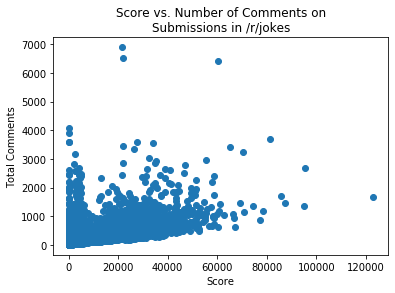

In [7]:
plt.scatter(dj.score, dj.num_comments);
plt.xlabel('Score')
plt.ylabel('Total Comments')
plt.title('Score vs. Number of Comments on\nSubmissions in /r/dadjokes')
plt.show()

plt.scatter(jokes.score, jokes.num_comments);
plt.xlabel('Score')
plt.ylabel('Total Comments')
plt.title('Score vs. Number of Comments on\nSubmissions in /r/jokes')
plt.show()

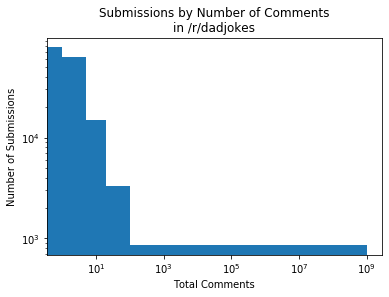

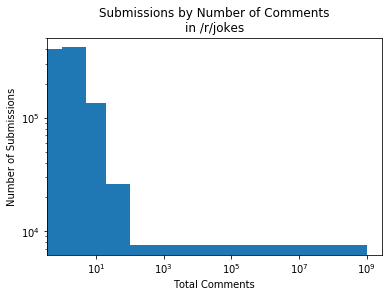

In [8]:
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Total Comments')
plt.ylabel('Number of Submissions')
plt.title('Submissions by Number of Comments\nin /r/dadjokes')
plt.hist(dj.num_comments, bins=[0,1,5,20,100,999999999]);
plt.show()

plt.xscale('log')
plt.yscale('log')
plt.xlabel('Total Comments')
plt.ylabel('Number of Submissions')
plt.title('Submissions by Number of Comments\nin /r/jokes')
plt.hist(jokes.num_comments, bins=[0,1,5,20,100,999999999]);
plt.show()

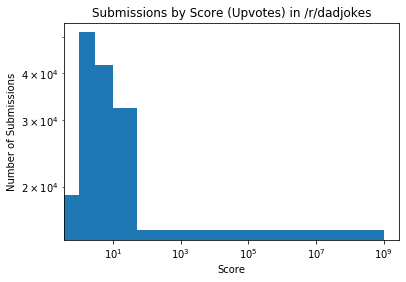

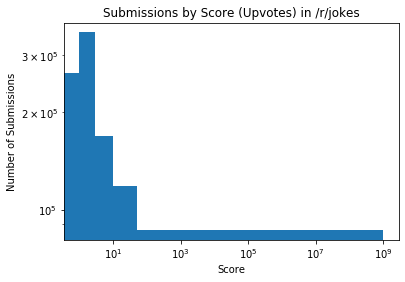

In [9]:
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Score')
plt.ylabel('Number of Submissions')
plt.title('Submissions by Score (Upvotes) in /r/dadjokes')
plt.hist(dj.score, bins=[0,1,3,10,50,999999999]);
plt.show()

plt.xscale('log')
plt.yscale('log')
plt.xlabel('Score')
plt.ylabel('Number of Submissions')
plt.title('Submissions by Score (Upvotes) in /r/jokes')
plt.hist(jokes.score, bins=[0,1,3,10,50,999999999]);
plt.show()

In [10]:
jokes['is_crosspost'] = ~jokes['parent_createdUTC'].isna()
jokes.groupby(by='is_crosspost').mean()    

,createdUTC,parent_createdUTC,score,num_comments
is_crosspost,,,,
False,1.490987e+09,NaN,104.289937,5.887396
True,1.543290e+09,1.541537e+09,1.002805,0.042076


In [11]:
dj['is_crosspost'] = ~dj['parent_createdUTC'].isna()
dj.groupby(by='is_crosspost').mean()    

,createdUTC,parent_createdUTC,score,num_comments
is_crosspost,,,,
False,1.494472e+09,NaN,91.791305,3.317967
True,1.544440e+09,1.543943e+09,2.568659,0.348950


##### Crossposts receive significantly lower scores, num_comments than original posts in the dadjokes subreddit. This may be because viewers are easily redirected to the parent post to comments or upvote in other areas of reddit. However, the contents of the crossposted jokes (title and selftext) are pulled from the parent posts. Therefore crossposts will be analyzed separately when attempting to predict scores, num_comments.

In [12]:
main_dj = dj[~dj.is_crosspost].drop(columns=['parent_createdUTC', 'is_crosspost'])
print(main_dj.shape)

main_jokes = jokes[~jokes.is_crosspost].drop(columns=['parent_createdUTC', 'is_crosspost'])
print(main_jokes.shape)

(159592, 7)
(989287, 7)


In [13]:
train_dj, test_dj = train_test_split(main_dj, test_size=0.2, random_state=42)
print(f"Training sample size: {len(train_dj)}\nTesting sample size: {len(test_dj)}")

train_jokes, test_jokes = train_test_split(main_jokes, test_size=0.2, random_state=42)
print(f"Training sample size: {len(train_jokes)}\nTesting sample size: {len(test_jokes)}")

Training sample size: 127673
Testing sample size: 31919
Training sample size: 791429
Testing sample size: 197858


In [19]:
train_dj[['id', 'title', 'author', 'selftext']].values[10]

array(['1yhk2g', 'When dad goes to work', nan,
       "Dad: 'Okay, I'm off to work.'\\n\\nMe: 'See you, dad.'\\n\\nDad: 'Why are you saying *city* in Spanish?' (*Ciudad*)\\n"],
      dtype=object)

In [14]:
score_cats = {'score_dud': 0, 'score_one': 1, 'score_meh': 5, 'score_ave': 20,
              'score_great': 100, 'score_hero': 99999999}
comment_cats = {'comments_dud': 0, 'comments_one': 1, 'comments_some': 3,
                'comments_ave': 10, 'comments_convo': 50, 'comments_rave': 99999999}

def _categories(data, col, cats):
    recorded = data[col] < 0
    for level, upper_bound in cats.items():
        below = data[col] <= upper_bound
        data[level] = pd.Series(map(xor, below, recorded), dtype=int, name=level)
        recorded = list(map(or_, below, recorded))
    return data


def make_categories(data):
    data = _categories(data, 'score', score_cats)
    data = _categories(data, 'num_comments', comment_cats)
    return data


newlines = re.compile(r'(\\n)+')
def _gettext(s):
    s = s.replace('&amp;#x200B;', '')
    s = newlines.sub(' ', s)
    return s


def prepare_text(data):
    data['title_clean'] = data.title.apply(_gettext)
    data['selftext_clean'] = data.selftext.apply(_gettext)
    return data


In [33]:
train_dj.reset_index(drop=True, inplace=True)
train_dj = make_categories(train_dj)
train_dj = prepare_text(train_dj)
train_dj.head()

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the docum

,id,createdUTC,author,title,selftext,score,num_comments,score_dud,score_one,score_meh,...,score_great,score_hero,comments_dud,comments_one,comments_some,comments_ave,comments_convo,comments_rave,title_clean,selftext_clean
0,2l2vef,1414950128,broccolibush42,My dad posted this picture on Facebook. He jus...,http://imgur.com/9M4dGnO\n\nMy dad is notoriou...,1342,41,0,0,0,...,0,1,0,0,0,0,1,0,My dad posted this picture on Facebook. He jus...,http://imgur.com/9M4dGnO My dad is notoriously...
1,2gtab2,1411085179,FlawlessBacon,So my dad out-dadjoked me today...,I was having dinner with my family when I reme...,6,0,0,0,0,...,0,0,1,0,0,0,0,0,So my dad out-dadjoked me today...,I was having dinner with my family when I reme...
2,7zmvtz,1519378372,NaN,Why did the baker have brown hands?,,1,0,0,1,0,...,0,0,1,0,0,0,0,0,Why did the baker have brown hands?,
3,ae0qnm,1546992196,Noeltm,What do you call it when canon ammunition cons...,Canonbalism,1,2,0,1,0,...,0,0,0,0,1,0,0,0,What do you call it when canon ammunition cons...,Canonbalism
4,72gkpd,1506384117,ZeLittleMan,I started getting death threats after wearing ...,Apparently there's a Bounty on my head,746,12,0,0,0,...,0,1,0,0,0,0,1,0,I started getting death threats after wearing ...,Apparently there's a Bounty on my head


In [ ]:
def vectorize_jokes(data):
    data['title_vec'] = list(nlp.pipe(data.title_clean))
    data['selftext_vec'] = list(nlp.pipe(data.selftext_clean))
    return data

In [34]:
small = train_dj[:100]
sample = small.apply(lambda row: (row['title_clean']+' '+row['selftext_clean'],
                                  {"cats": row[list(score_cats.keys())].to_dict()}), axis=1)
TRAIN_DATA = sample.to_list()

In [ ]:
textcat = nlp.create_pipe("pytt_textcat", config={"exclusive_classes": True, 'width':1000})
for label in score_cats.keys():
    textcat.add_label(label)
nlp.add_pipe(textcat)


In [ ]:
print(nlp.pipe_names)

In [ ]:
optimizer = nlp.resume_training()
for i in range(10):
    random.shuffle(TRAIN_DATA)
    losses = {}
    for batch in minibatch(TRAIN_DATA, size=5):
        texts, cats = zip(*batch)
        nlp.update(texts, cats, sgd=optimizer, losses=losses)
    print(i, losses)
nlp.to_disk("/roberta-textcat")

In [38]:
r = 'sample = pd'

In [39]:
r.replace('ample', 't')

'st = pd'

In [47]:
if None:
    print('s')

In [46]:
l[0]

TypeError: 'NoneType' object is not subscriptable

In [29]:
q = (1,2,3,4,None)

In [31]:
z==list(q)

True